In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1)

In [5]:
X, y

(array([[ 0.587692  , -0.45365487],
        [-0.69695091,  0.87306801],
        [-0.96375485,  0.46612265],
        [-0.18506322,  1.00792667],
        [-1.07370547,  0.19551162],
        [ 0.09070215,  0.16450131],
        [ 0.34307898, -0.31771342],
        [ 0.85032648,  0.49348067],
        [ 0.87683841,  0.63765897],
        [ 1.08598928,  0.21408207],
        [ 0.07051387, -0.01568919],
        [ 1.02104634,  0.20861014],
        [ 0.77412249, -0.54005697],
        [ 1.20551869, -0.3734321 ],
        [-0.94140405,  0.55386963],
        [-0.20813542,  1.009785  ],
        [ 0.96285493,  0.59868856],
        [ 1.09368781, -0.35683284],
        [-0.69808565,  1.05959194],
        [ 0.95431034, -0.59475707],
        [-0.95199246,  0.26578448],
        [-0.96306002,  0.3390798 ],
        [ 0.94019376, -0.48392003],
        [ 1.91739635,  0.40392153],
        [ 0.27104572, -0.18851011],
        [ 0.24511861, -0.41148687],
        [-0.18598501,  1.09318083],
        [ 0.54533044,  0.558

In [6]:
X_outliers = np.random.uniform(low=-3, high=3, size=(20, 2))
X = np.vstack((X, X_outliers))

In [7]:
X

array([[ 0.587692  , -0.45365487],
       [-0.69695091,  0.87306801],
       [-0.96375485,  0.46612265],
       [-0.18506322,  1.00792667],
       [-1.07370547,  0.19551162],
       [ 0.09070215,  0.16450131],
       [ 0.34307898, -0.31771342],
       [ 0.85032648,  0.49348067],
       [ 0.87683841,  0.63765897],
       [ 1.08598928,  0.21408207],
       [ 0.07051387, -0.01568919],
       [ 1.02104634,  0.20861014],
       [ 0.77412249, -0.54005697],
       [ 1.20551869, -0.3734321 ],
       [-0.94140405,  0.55386963],
       [-0.20813542,  1.009785  ],
       [ 0.96285493,  0.59868856],
       [ 1.09368781, -0.35683284],
       [-0.69808565,  1.05959194],
       [ 0.95431034, -0.59475707],
       [-0.95199246,  0.26578448],
       [-0.96306002,  0.3390798 ],
       [ 0.94019376, -0.48392003],
       [ 1.91739635,  0.40392153],
       [ 0.27104572, -0.18851011],
       [ 0.24511861, -0.41148687],
       [-0.18598501,  1.09318083],
       [ 0.54533044,  0.55894587],
       [ 2.10543051,

In [8]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(X)

In [9]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

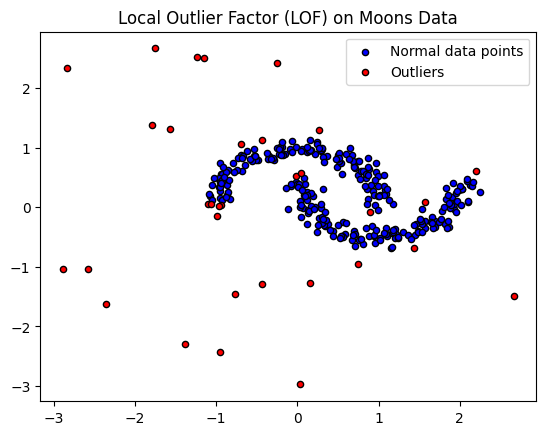

In [10]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()